Import necessary libraries

In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset

In [6]:
df = pd.read_csv("./sales_data_sample.csv", encoding='ISO-8859-1')

# Step 2: Data Preprocessing

Dropping unnecessary columns for clustering (ORDERNUMBER, ORDERDATE, etc.)

In [9]:
df = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MONTH_ID', 'YEAR_ID']]

# Check for any null values

In [11]:
print("Null values:\n", df.isnull().sum())

Null values:
 QUANTITYORDERED    0
PRICEEACH          0
SALES              0
MONTH_ID           0
YEAR_ID            0
dtype: int64


Scaling the data for K-means

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Determine the optimal number of clusters using the Elbow Method

In [15]:
inertia = []
K_range = range(1, 11)

In [16]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

Plot the Elbow Graph

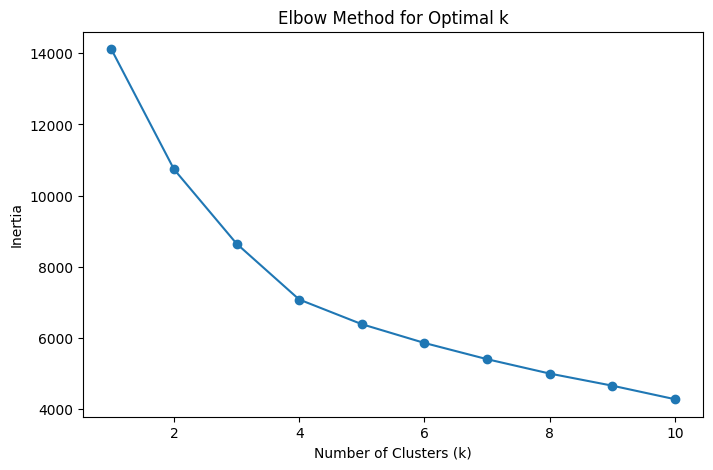

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Step 4: Apply K-Means with Optimal Number of Clusters (e.g., using k=4 after analyzing elbow plot)

In [20]:
optimal_k = 4  # Replace based on elbow plot observation
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Visualizations

Scatter plot for two features colored by cluster

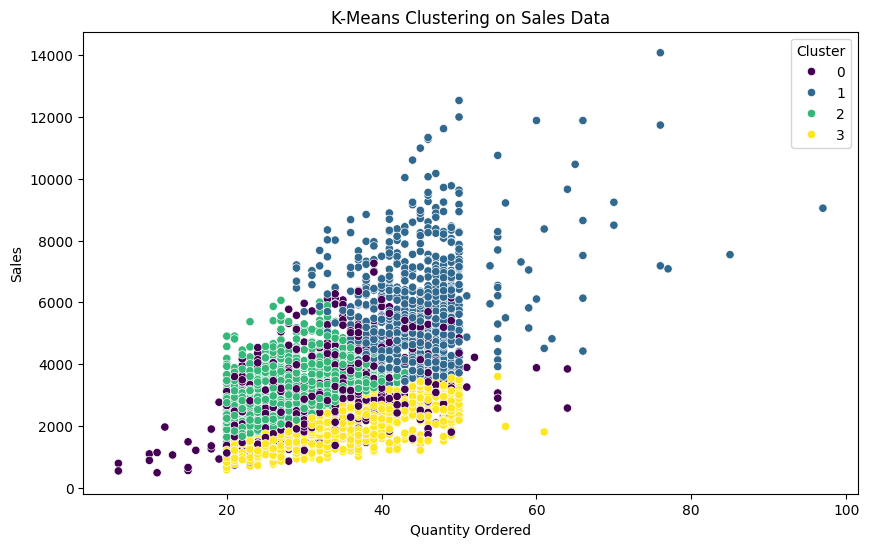

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['QUANTITYORDERED'], y=df['SALES'], hue=df['Cluster'], palette='viridis')
plt.title("K-Means Clustering on Sales Data")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales")
plt.legend(title='Cluster')
plt.show()

Pair plot of features with cluster color for deeper analysis

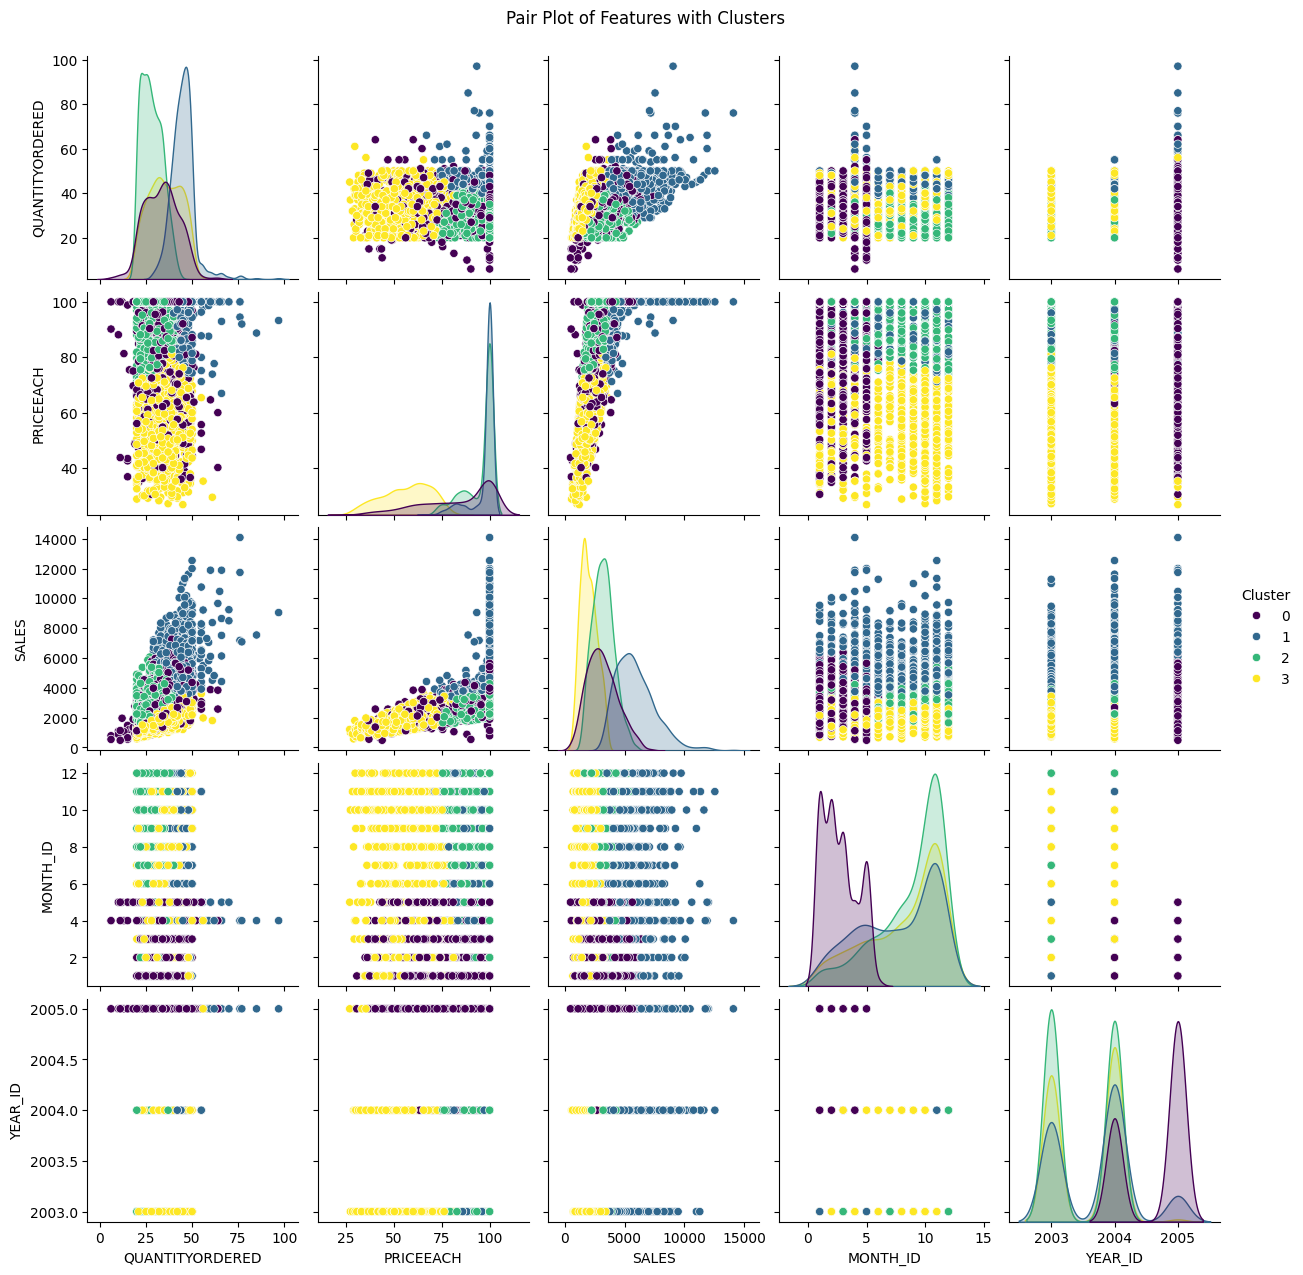

In [25]:
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', markers='o')
plt.suptitle("Pair Plot of Features with Clusters", y=1.02)
plt.show()

Optional: Print silhouette score

In [27]:
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg:.4f}")

Silhouette Score for k=4: 0.2435
